# Caso de estudio: Choques y siniestros de Nuevo León.

## Cleaning de los datos

Elaborado por: Nemesio Navarro Arámbula

### Librerías

In [1]:
import numpy as np
import pandas as pd
import difflib # Analisis de similitud de palabras

from scipy import stats
from statsmodels.graphics.gofplots import qqplot

from chart_studio import plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
import plotly.express as px

import matplotlib.pyplot as plt

### Importar datos

In [2]:
data = pd.read_excel("BD_HackMTY_ChoquesYSiniestrosMONTERREY_2020_V2.xlsx")
data

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,ESTADO,CIUDAD_APROXIMADA,DATE
0,D00005,19.266303,-99.331791,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NaN,2018,1,3,MIERCOLES,16,NUEVO LEÓN,MONTERREY,2018-01-03
1,D00007,25.660916,-100.282504,64820,Avenida Revolución,Valle del Huajuco,COLISION Y/O VUELCO,Auto,PLATA,2006,NaN,NaN,2018,1,22,LUNES,12,NUEVO LEÓN,MONTERREY,2018-01-22
2,D00011,25.724544,-100.373691,64619,ABEDUL,VILLA DORADA,COLISION Y/O VUELCO,Auto,ROJO,2015,Bajo,Costado der central,2018,1,1,LUNES,0,NUEVO LEÓN,MONTERREY,2018-01-01
3,D00012,25.631471,-100.300988,64760,ALFONSO REYES,15 de Septiembre,COLISION Y/O VUELCO,Auto,BLANCO,2000,Sin daño,Costado izq delantero,2018,1,1,LUNES,2,NUEVO LEÓN,MONTERREY,2018-01-01
4,D00019,25.728476,-100.333627,64250,Pablo Hernández,FERROCARRILERA,COLISION Y/O VUELCO,Auto,BLANCO,2015,Bajo,Costado izq delantero,2018,1,1,LUNES,9,NUEVO LEÓN,MONTERREY,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,D116002,NaN,NaN,\N,PROV. 19278 / CARLOS ALBERTO ALEJANDRO HERNAND...,CENTRO,COLISION Y/O VUELCO,Auto,AZUL,2007,Bajo,Costado der delantero,2016,1,10,DOMINGO,22,NUEVO LEÓN,MONTERREY,2016-01-10
43426,D116003,NaN,NaN,\N,PROV. 19765 / Roel Francisco Salinas Madrigal ...,FUENTES DEL VALLE,COLISION Y/O VUELCO,Auto,GRIS,2008,Sin daño,NaN,2016,3,6,DOMINGO,22,NUEVO LEÓN,MONTERREY,2016-03-06
43427,D116004,25.660844,-100.312296,64720,San Luis Potosí,Independencia,COLISION Y/O VUELCO,Auto,GRIS,2008,Bajo,Costado der trasero,2016,8,30,MARTES,21,NUEVO LEÓN,MONTERREY,2016-08-30
43428,D116012,25.745930,-100.360152,64330,tlatelolco,unidad habitacional morelos,COLISION Y/O VUELCO,Auto,vino /dora,2003,Sin daño,Costado der trasero,2016,12,29,JUEVES,19,NUEVO LEÓN,MONTERREY,2016-12-29


In [3]:
data_clean = data.copy()

### Valores nulos

In [4]:
data_clean.isna().sum()

FOLIO_ID                  0
LAT                     980
LONG                    980
CODIGO POSTAL            40
CALLE                     1
COLONIA                  19
CAUSA SINIESTRO           0
TIPO VEHICULO            36
COLOR                    59
MODELO_VEHICULO          34
NIVEL DAÑO VEHICULO     303
PUNTO DE IMPACTO       3805
AÑO                       0
MES                       0
DÍA NUMERO                0
DIA                       0
HORA                      0
ESTADO                    0
CIUDAD_APROXIMADA         0
DATE                      0
dtype: int64

Se puede observar que la base de datos es bastante completa, solamente destacan la cantidad de valores nulos las variables de coordenadas y el punto de impacto. Opté por no eliminar estos registros debido a que la información de estos para otras variables es valiosa.

### Eliminar columnas redundantes

#### Estado

In [5]:
data_clean['ESTADO'].unique()

array(['NUEVO LEÓN'], dtype=object)

In [6]:
data_clean = data_clean.drop(columns=['ESTADO'])

In [7]:
data_clean.columns

Index(['FOLIO_ID', 'LAT', 'LONG', 'CODIGO POSTAL', 'CALLE', 'COLONIA',
       'CAUSA SINIESTRO', 'TIPO VEHICULO', 'COLOR', 'MODELO_VEHICULO',
       'NIVEL DAÑO VEHICULO', 'PUNTO DE IMPACTO', 'AÑO', 'MES', 'DÍA NUMERO',
       'DIA', 'HORA', 'CIUDAD_APROXIMADA', 'DATE'],
      dtype='object')

#### Ciudad aproximada

In [8]:
data_clean['CIUDAD_APROXIMADA'].unique()

array(['MONTERREY'], dtype=object)

In [9]:
data_clean = data_clean.drop(columns=['CIUDAD_APROXIMADA'])

In [10]:
data_clean.columns

Index(['FOLIO_ID', 'LAT', 'LONG', 'CODIGO POSTAL', 'CALLE', 'COLONIA',
       'CAUSA SINIESTRO', 'TIPO VEHICULO', 'COLOR', 'MODELO_VEHICULO',
       'NIVEL DAÑO VEHICULO', 'PUNTO DE IMPACTO', 'AÑO', 'MES', 'DÍA NUMERO',
       'DIA', 'HORA', 'DATE'],
      dtype='object')

### Verificar formato por columna

#### Latitud y Longitud

##### Identificar latitudes alejadas de Monterrey

In [11]:
data_clean['LAT'].sort_values()[:42450]

1284    -12.038977
43429    17.953086
7114     18.366321
7118     19.171640
7008     19.202119
           ...    
7006     27.428165
22774    27.477936
7112     27.841907
22771    32.546452
28196    33.640945
Name: LAT, Length: 42450, dtype: float64

In [12]:
# Identificar indices fuera de los bordes establecidos
high_lat = np.where(data_clean['LAT'] >= 26.0)
low_lat = np.where(data_clean['LAT'] <= 25.0)
outlier_lat = np.concatenate((low_lat[0],high_lat[0]))

##### Identificar longitudes alejadas de Monterrey

In [13]:
data_clean['LONG'].sort_values()[:42450]

22771   -115.070033
7112    -109.370473
22919   -103.705680
22920   -103.342329
22789   -102.287268
            ...    
22775    -98.203525
43429    -93.025856
28196    -84.443949
1284     -76.939038
7114     -66.017857
Name: LONG, Length: 42450, dtype: float64

In [14]:
# Identificar indices fuera de los bordes establecidos
high_long = np.where(data_clean['LONG'] <= -101)
low_long = np.where(data_clean['LONG'] >= -100)
outlier_long = np.concatenate((low_long[0],high_long[0]))

##### Remover coordenadas alejadas de Monterrey

In [15]:
outliers_coords = np.concatenate((outlier_lat,outlier_long))
outliers_coords = np.unique(outliers_coords)

In [16]:
data_clean.loc[outliers_coords].head()

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,DATE
0,D00005,19.266303,-99.331791,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NaN,2018,1,3,MIERCOLES,16,2018-01-03
1244,D03104,25.911492,-99.402602,66850,20 de Noviembre,Villa Los Herreras/CENTRO,COLISION Y/O VUELCO,Auto,AZUL,2005,Bajo,Trasero,2018,2,4,DOMINGO,17,2018-02-04
1284,D03181,-12.038977,-76.939038,15498,ORION,CONTRY,COLISION Y/O VUELCO,Auto,GRIS,2003,Medio,Costado der delantero,2018,2,6,MARTES,14,2018-02-06
1599,D03936,25.598910,-99.983183,67483,Venustiano Carranza,CENTRO,COLISION Y/O VUELCO,Auto,GRIS,2016,Bajo,Trasero,2018,2,14,MIERCOLES,7,2018-02-14
1841,D04433,25.584191,-99.996489,67450,Escobedo,Cadereyta Jiménez Centro,COLISION Y/O VUELCO,Auto,GRIS,2007,Sin daño,Cofre,2018,2,19,LUNES,0,2018-02-19


In [17]:
# Convertir a NaN las coordenadas alejadas de Monterrey
data_clean.loc[outliers_coords,['LAT','LONG']] = np.nan

In [18]:
data_clean.loc[outliers_coords].head()

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,DATE
0,D00005,NaN,NaN,\N,UBERP3,Cuajimalpa,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016,Medio,NaN,2018,1,3,MIERCOLES,16,2018-01-03
1244,D03104,NaN,NaN,66850,20 de Noviembre,Villa Los Herreras/CENTRO,COLISION Y/O VUELCO,Auto,AZUL,2005,Bajo,Trasero,2018,2,4,DOMINGO,17,2018-02-04
1284,D03181,NaN,NaN,15498,ORION,CONTRY,COLISION Y/O VUELCO,Auto,GRIS,2003,Medio,Costado der delantero,2018,2,6,MARTES,14,2018-02-06
1599,D03936,NaN,NaN,67483,Venustiano Carranza,CENTRO,COLISION Y/O VUELCO,Auto,GRIS,2016,Bajo,Trasero,2018,2,14,MIERCOLES,7,2018-02-14
1841,D04433,NaN,NaN,67450,Escobedo,Cadereyta Jiménez Centro,COLISION Y/O VUELCO,Auto,GRIS,2007,Sin daño,Cofre,2018,2,19,LUNES,0,2018-02-19


#### Codigo postal

In [19]:
data_clean['CODIGO POSTAL'].unique()

array(['\\N', 64820, 64619, 64760, 64250, 64346, 64550, 64330, 64480,
       64150, 6400, 64810, 64898, 64649, 64620, 64410, 64830, 64637,
       64030, 647770, 66055, 64590, 64400, 64105, 64660, 66290, 64200,
       64560, 64610, 66367, 66610, 64890, 64000, 64117, 66023, 66550,
       64988, 64166, 64740, 64260, 64720, 64925, 64800, 67450, 64960,
       64320, 64638, 64984, 67288, 64569, 64580, 64530, 64349, 64700,
       64790, 64380, 64440, 64490, 64420, 64300, 64500, 64020, 64640,
       64460, 64520, 64636, 66239, 64780, 64050, 64180, 64549, 64100,
       64860, 66422, 64850, 64750, 67196, 64510, 64430, 67315, 64920,
       64270, 64060, 64635, 64210, 64116, 66064, 67890, 67140, 66482,
       66210, 64765, 64450, 64989, 64280, 64340, 64238, 64108, 64350,
       64190, 64010, 64240, 64634, 64633, 64650, 64710, 66473, 64632,
       67250, 66673, 64103, 64753, 66632, 64840, 64310, 64630, 64109,
       64985, 64769, 64600, 64910, 64987, 64344, 67610, 64106, 64102,
       64348, 66200,

In [20]:
# Verificar que todos los registros sean números
cp_not_num = [cp for cp in data_clean['CODIGO POSTAL'] if type(cp) is not int]
cp_not_num = list(set(cp_not_num))
data_clean['CODIGO POSTAL'].replace(to_replace=cp_not_num, value=np.nan, inplace=True)

In [21]:
data_clean['CODIGO POSTAL'].value_counts()[647770.0]

1149

In [22]:
# Reemplazar CPs mal escritos (6400 -> 64000 & 647770 -> 64770)
data_clean['CODIGO POSTAL'].replace(to_replace=6400.0, value=64000.0, inplace=True)
data_clean['CODIGO POSTAL'].replace(to_replace=647770.0, value=64770.0, inplace=True)

In [23]:
# Verificar que los codigos sean de Nuevo Leon
cp_not_nl = [cp for cp in data_clean['CODIGO POSTAL'].unique() if cp < 64000 or cp > 68000]
cp_not_nl = list(set(cp_not_nl))
data_clean['CODIGO POSTAL'].replace(to_replace=cp_not_nl, value=np.nan, inplace=True)

In [24]:
data_clean['CODIGO POSTAL'].unique()

array([   nan, 64820., 64619., 64760., 64250., 64346., 64550., 64330.,
       64480., 64150., 64000., 64810., 64898., 64649., 64620., 64410.,
       64830., 64637., 64030., 64770., 66055., 64590., 64400., 64105.,
       64660., 66290., 64200., 64560., 64610., 66367., 66610., 64890.,
       64117., 66023., 66550., 64988., 64166., 64740., 64260., 64720.,
       64925., 64800., 67450., 64960., 64320., 64638., 64984., 67288.,
       64569., 64580., 64530., 64349., 64700., 64790., 64380., 64440.,
       64490., 64420., 64300., 64500., 64020., 64640., 64460., 64520.,
       64636., 66239., 64780., 64050., 64180., 64549., 64100., 64860.,
       66422., 64850., 64750., 67196., 64510., 64430., 67315., 64920.,
       64270., 64060., 64635., 64210., 64116., 66064., 67890., 67140.,
       66482., 66210., 64765., 64450., 64989., 64280., 64340., 64238.,
       64108., 64350., 64190., 64010., 64240., 64634., 64633., 64650.,
       64710., 66473., 64632., 67250., 66673., 64103., 64753., 66632.,
      

#### Calle

In [25]:
# Todos los registros en mayuscula
data_clean['CALLE'] = data_clean['CALLE'].str.upper()

# NaNs
data_clean['CALLE'].replace(to_replace='\\N', value=np.nan, inplace=True)

#### Colonia

In [26]:
# Todos los registros en mayuscula
data_clean['COLONIA'] = data_clean['CALLE'].str.upper()

# NaNs
data_clean['COLONIA'].replace(to_replace='\\N', value=np.nan, inplace=True)

#### Causa siniestro

In [27]:
data_clean['CAUSA SINIESTRO'].unique()

array(['HUELGAS Y ALBOROTOS', 'COLISION Y/O VUELCO', 'ATROPELLO',
       'INCENDIO RAYO O EXPLOSION', 'DAÑOS POR LA CARGA',
       'FENOMENOS DE LA NATURALEZA', 'TRANSPORTACION'], dtype=object)

#### Tipo vehiculo

In [28]:
data_clean['TIPO VEHICULO'].unique()

array(['Auto', 'Camión Ligero', 'Camión', nan, 'Motocicleta', '\\N'],
      dtype=object)

In [29]:
# NaNs
data_clean['TIPO VEHICULO'].replace(to_replace='\\N', value=np.nan, inplace=True)

In [30]:
data_clean['TIPO VEHICULO'].unique()

array(['Auto', 'Camión Ligero', 'Camión', nan, 'Motocicleta'],
      dtype=object)

#### Color

In [31]:
data_clean['COLOR'].unique()

array(['NEGRO', 'PLATA', 'ROJO', ..., 'CAFE ARENA', 'naranga',
       'vino /dora'], dtype=object)

In [32]:
# Todos los registros en mayuscula
data_clean['COLOR'] = data_clean['COLOR'].str.upper()

In [33]:
# Crear una lista con los 11 colores básicos
# Remover colores basicos para observar errores comunes en el resto de registros
colores_basicos = ['NEGRO', 'AZUL', 'BEIGE', 'CAFE', 'GRIS', 'VERDE', 'NARANJA', 'MORADO', 'ROJO', 'BLANCO', 'AMARILLO', 'PLATA', 'GUINDA']
colores_fix = [color for color in data_clean['COLOR'] if color not in colores_basicos]

In [34]:
# Obtener lista de colores a corregir
colores_fix = pd.Series(colores_fix).unique()
colores_fix = list(colores_fix)
colores_fix = [x for x in colores_fix if str(x) != 'nan']

In [35]:
# Remover el segundo color por simplicidad (despues del '/')
sep = '/'
colores_fix_unit = [color.split(sep, 1)[0] for color in colores_fix]
colores_fix_unit = list(pd.Series(colores_fix_unit).unique())

In [36]:
# Análisis de similitud
cambios = {}

for color in colores_basicos:
    cambios[color] = difflib.get_close_matches(color, colores_fix_unit, n=200)

In [37]:
# Muestra de resultados
print(cambios['NEGRO'][:10])
print(cambios['BLANCO'][:10])
print(cambios['VERDE'][:10])

['NEGRO', 'NEGBRO', 'NEGR', 'EGRO', 'NEGRO73', 'NEGRO17', 'NEGRO14', 'NWGRO', 'NEGRA', 'BEGRO']
['BLANCO', 'YBLANCO', 'WBLANCO', 'QBLANCO', 'BÑLANCO', 'BLKANCO', 'BLANCOS', 'BLANCOQ', 'BLANCOI', 'BLANCO ']
['VERDE', 'VEREDE', 'VERDE ', 'VEDRDE', 'VERDE96', 'VERDE94', 'VREDE', 'VERDA', 'VERDE 15', 'BCOVERDE']


In [38]:
# Refinar resultados de cambios (visualizar cambios (diccionario) entero)

# Gris
cambios['GRIS'].remove('GRINDA')
cambios['GRIS'].append('GRIS OSCUR')
cambios['GRIS'].append('GRIS OSCU')
cambios['GRIS'].append('GRIS OXFOR')
cambios['GRIS'].append('GRIS METALICO')

# Guinda
cambios['GUINDA'].append('VINO')
cambios['GUINDA'].remove('NADA')
cambios['GUINDA'].remove('SINDATO')

# Naranja
cambios['NARANJA'].remove('AREANA')
cambios['NARANJA'].remove('ARENAS')
cambios['NARANJA'].remove('AREENA')

# Morado
cambios['MORADO'].remove('DORADO')
cambios['MORADO'].remove('ORO')
cambios['MORADO'].remove('DARADO')
cambios['MORADO'].remove('DORADA')
cambios['MORADO'].remove('COBRIZADO')

# Blanco
cambios['BLANCO'].remove('PLATINO')

# Plata
cambios['PLATA'].append('PLATINO')

# Amarillo
cambios['AMARILLO'].remove('AZUL MARINO')
cambios['AMARILLO'].append('ORO')
cambios['AMARILLO'].append('DORADO')
cambios['AMARILLO'].append('DARADO')
cambios['AMARILLO'].append('DORADA')

# CAFE
cambios['CAFE'].append('BEIGE')
cambios['CAFE'].append('MARRON')
cambios['CAFE'].append('AREANA')
cambios['CAFE'].append('ARENAS')
cambios['CAFE'].append('AREENA')
cambios['CAFE'].append('COBRIZADO')
cambios['CAFE'].append('CREMA')
cambios['CAFE'].append('CHAMPAGNE')

# Negro
cambios['BEIGE'].remove('BEGRO')
cambios['NEGRO'].append('BEGRO')

# NaN
cambios['nan'] = ['NADA', 'SINDATO']

In [39]:
# Colores parecidos o sinónimos

# Azul
cambios['AZUL'].append('AZUL MARIN')
cambios['AZUL'].append('AZUL MARINO')
cambios['AZUL'].append('CELESTE')
cambios['AZUL'].append('AZUL CELES')

In [40]:
# Realizar cambios en DataFrame
for color in cambios:
    for error in cambios[color]:
        data_clean['COLOR'].replace(to_replace=error, value=color, inplace=True)

# NaNs
data_clean['COLOR'].replace(to_replace='\\N', value=np.nan, inplace=True)

In [41]:
freq_colores = data_clean['COLOR'].value_counts()
freq_colores[:15]

BLANCO         13755
GRIS            8062
ROJO            4225
PLATA           3904
NEGRO           3243
AZUL            2814
NARANJA         1647
GUINDA          1185
AMARILLO        1053
VERDE           1046
CAFE             548
MORADO            51
BLANCO/ROJO       41
BLANCO/VER        29
BLANCO/ROJ        28
Name: COLOR, dtype: int64

#### Modelo vehiculo

In [42]:
data_clean['MODELO_VEHICULO'].unique()

array([2016, 2006, 2015, 2000, 2013, 2004, 2007, 2003, 2017, 2014, 2011,
       2012, 2005, 1996, 1993, 2010, 2008, 2002, 1999, 2001, 2009, 2018,
       1995, 1990, nan, 1994, 1998, 1992, 1954, 1997, 1989, 1988, 1991,
       1978, 1950, 1961, 1980, 1979, 1983, 1981, 1984, 1972, 0, '\\N',
       1000, 1987, 1974, 1985, 1982, 1986, 1975, 1973, 1976, 1966, 1977,
       1970, 1952], dtype=object)

In [43]:
# NaNs
data_clean['MODELO_VEHICULO'].replace(to_replace=['\\N',0,1000], value=np.nan, inplace=True)

In [44]:
np.array(set(list(data_clean['MODELO_VEHICULO'].unique())))

array({nan, 1950.0, 1952.0, 1954.0, 1961.0, 1966.0, 1970.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0},
      dtype=object)

#### Nivel daño vehiculo

In [45]:
data_clean['NIVEL DAÑO VEHICULO'].unique()

array(['Medio', nan, 'Bajo', 'Sin daño', 'Alto', '\\N'], dtype=object)

In [46]:
# NaNs
data_clean['NIVEL DAÑO VEHICULO'].replace(to_replace='\\N', value=np.nan, inplace=True)

In [47]:
data_clean['NIVEL DAÑO VEHICULO'].unique()

array(['Medio', nan, 'Bajo', 'Sin daño', 'Alto'], dtype=object)

#### Punto de impacto

In [48]:
data_clean['PUNTO DE IMPACTO'].unique()

array([nan, 'Costado der central', 'Costado izq delantero',
       'Costado izq trasero', 'Trasero', 'Costado der delantero', 'Cofre',
       'Frontal', 'Costado izq central', 'Costado der trasero', 'Toldo',
       'Parte baja', 'Tapa cajuela', '\\N'], dtype=object)

In [49]:
# NaNs
data_clean['PUNTO DE IMPACTO'].replace(to_replace='\\N', value=np.nan, inplace=True)

In [50]:
data_clean['PUNTO DE IMPACTO'].unique()

array([nan, 'Costado der central', 'Costado izq delantero',
       'Costado izq trasero', 'Trasero', 'Costado der delantero', 'Cofre',
       'Frontal', 'Costado izq central', 'Costado der trasero', 'Toldo',
       'Parte baja', 'Tapa cajuela'], dtype=object)

#### Año

In [51]:
data_clean['AÑO'].unique()

array([2018, 2017, 2016], dtype=int64)

#### Mes

In [52]:
data_clean['MES'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

#### Dia numero

In [53]:
data_clean['DÍA NUMERO'].unique()

array([ 3, 22,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

#### Dia

In [54]:
data_clean['DIA'].unique()

array(['MIERCOLES', 'LUNES', 'MARTES', 'JUEVES', 'VIERNES', 'SABADO',
       'DOMINGO'], dtype=object)

#### Hora

In [55]:
np.sort(data_clean['HORA'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

#### Date

In [56]:
dates = data_clean['DATE']
dates = dates.sort_values()
dates = dates.reset_index(drop=True)
dates

0       2016-01-01
1       2016-01-01
2       2016-01-01
3       2016-01-01
4       2016-01-01
           ...    
43425   2018-06-30
43426   2018-06-30
43427   2018-06-30
43428   2018-06-30
43429   2018-06-30
Name: DATE, Length: 43430, dtype: datetime64[ns]

In [57]:
sin_per_day = dates.value_counts().sort_index()
sin_per_day

2016-01-01    24
2016-01-02    34
2016-01-03    22
2016-01-04    48
2016-01-05    57
              ..
2018-06-26    33
2018-06-27    44
2018-06-28    54
2018-06-29    42
2018-06-30    40
Name: DATE, Length: 911, dtype: int64

In [58]:
px.line(sin_per_day, title='Siniestros por día')

La cantidad de siniestros el dia 4 de mayo de 2017 es algo fuera de lugar, ya que esta muy alejado del promedio y del proximo valor mas alto.

In [59]:
sin_per_day[sin_per_day==max(sin_per_day)]

2017-05-04    150
Name: DATE, dtype: int64

In [60]:
data_clean[data_clean['DATE']==sin_per_day[sin_per_day==max(sin_per_day)].index[0]]

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,DATE
7042,D17544,25.622544,-100.302250,64900.0,PLAZA DE LA CONCORDIA 5617,PLAZA DE LA CONCORDIA 5617,COLISION Y/O VUELCO,Auto,CAFE,2012.0,Bajo,Toldo,2017,5,4,JUEVES,7,2017-05-04
12563,D32890,25.627110,-100.297209,64900.0,PLAN DE GALEANA 2839,PLAN DE GALEANA 2839,COLISION Y/O VUELCO,Auto,GRIS,2007.0,Bajo,Cofre,2017,5,4,JUEVES,8,2017-05-04
12567,D32915,25.646270,-100.292251,64840.0,AVENIDA LUIS ELIZONDO,AVENIDA LUIS ELIZONDO,COLISION Y/O VUELCO,Auto,BLANCO,2014.0,Bajo,Costado izq trasero,2017,5,4,JUEVES,3,2017-05-04
12568,D32916,25.621533,-100.300494,64920.0,CORNALINA 5436,CORNALINA 5436,FENOMENOS DE LA NATURALEZA,Auto,PLATA,2016.0,Bajo,Toldo,2017,5,4,JUEVES,3,2017-05-04
12569,D32917,25.617925,-100.315433,64925.0,LEONARDO 316,LEONARDO 316,FENOMENOS DE LA NATURALEZA,Auto,BLANCO,2015.0,Bajo,Toldo,2017,5,4,JUEVES,3,2017-05-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12710,D33322,25.675124,-100.363330,64620.0,BMX CALZADA SAN JERONIMO 999 PISO 9,BMX CALZADA SAN JERONIMO 999 PISO 9,COLISION Y/O VUELCO,Auto,BLANCO,2013.0,NaN,NaN,2017,5,4,JUEVES,22,2017-05-04
12711,D33323,25.671748,-100.375715,66220.0,BLV. GUSTAVO DIAZ ORDAZ,BLV. GUSTAVO DIAZ ORDAZ,FENOMENOS DE LA NATURALEZA,Auto,BLANCO,2015.0,Bajo,Toldo,2017,5,4,JUEVES,22,2017-05-04
12712,D33325,25.622550,-100.304639,64900.0,PLAZA MIGUEL ANGEL 5609,PLAZA MIGUEL ANGEL 5609,FENOMENOS DE LA NATURALEZA,Auto,BLANCO,2013.0,NaN,NaN,2017,5,4,JUEVES,22,2017-05-04
12713,D33328,25.651696,-100.292146,64700.0,AUGENIO GARZA SADA,AUGENIO GARZA SADA,COLISION Y/O VUELCO,Auto,GRIS,2015.0,Sin daño,Cofre,2017,5,4,JUEVES,22,2017-05-04


A primera vista, los registros de esta fecha parecen normales, es por esto que no se modificará la cantidad de estos, debido a que es informaión valiosa la que contiene en cada una de las variables (columnas).

In [61]:
px.histogram(sin_per_day)

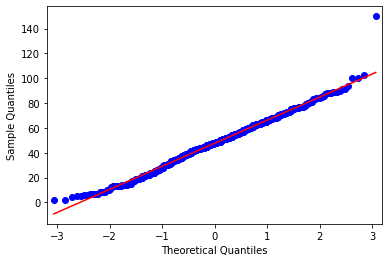

In [62]:
qqplot_data = qqplot(sin_per_day, line='s').gca().lines

In [63]:
fig = go.Figure()

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[0].get_xdata(),
    'y': qqplot_data[0].get_ydata(),
    'mode': 'markers',
    'marker': {
        'color': '#19d3f3'
    }
})

fig.add_trace({
    'type': 'scatter',
    'x': qqplot_data[1].get_xdata(),
    'y': qqplot_data[1].get_ydata(),
    'mode': 'lines',
    'line': {
        'color': '#636efa'
    }

})


fig['layout'].update({
    'title': 'Quantile-Quantile Plot',
    'xaxis': {
        'title': 'Theoritical Quantities',
        'zeroline': False
    },
    'yaxis': {
        'title': 'Sample Quantities'
    },
    'showlegend': False,
    'width': 800,
    'height': 600,
})

fig.show()


In [64]:
# Identificar outliers
z = np.abs(stats.zscore(sin_per_day))

threshold = 3
np.where(z > threshold)

(array([489], dtype=int64),)

In [65]:
z[489]

5.497822162879945

## Exportar Datos

In [66]:
data_clean

,FOLIO_ID,LAT,LONG,CODIGO POSTAL,CALLE,COLONIA,CAUSA SINIESTRO,TIPO VEHICULO,COLOR,MODELO_VEHICULO,NIVEL DAÑO VEHICULO,PUNTO DE IMPACTO,AÑO,MES,DÍA NUMERO,DIA,HORA,DATE
0,D00005,NaN,NaN,NaN,UBERP3,UBERP3,HUELGAS Y ALBOROTOS,Auto,NEGRO,2016.0,Medio,NaN,2018,1,3,MIERCOLES,16,2018-01-03
1,D00007,25.660916,-100.282504,64820.0,AVENIDA REVOLUCIÓN,AVENIDA REVOLUCIÓN,COLISION Y/O VUELCO,Auto,PLATA,2006.0,NaN,NaN,2018,1,22,LUNES,12,2018-01-22
2,D00011,25.724544,-100.373691,64619.0,ABEDUL,ABEDUL,COLISION Y/O VUELCO,Auto,ROJO,2015.0,Bajo,Costado der central,2018,1,1,LUNES,0,2018-01-01
3,D00012,25.631471,-100.300988,64760.0,ALFONSO REYES,ALFONSO REYES,COLISION Y/O VUELCO,Auto,BLANCO,2000.0,Sin daño,Costado izq delantero,2018,1,1,LUNES,2,2018-01-01
4,D00019,25.728476,-100.333627,64250.0,PABLO HERNÁNDEZ,PABLO HERNÁNDEZ,COLISION Y/O VUELCO,Auto,BLANCO,2015.0,Bajo,Costado izq delantero,2018,1,1,LUNES,9,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43425,D116002,NaN,NaN,NaN,PROV. 19278 / CARLOS ALBERTO ALEJANDRO HERNAND...,PROV. 19278 / CARLOS ALBERTO ALEJANDRO HERNAND...,COLISION Y/O VUELCO,Auto,AZUL,2007.0,Bajo,Costado der delantero,2016,1,10,DOMINGO,22,2016-01-10
43426,D116003,NaN,NaN,NaN,PROV. 19765 / ROEL FRANCISCO SALINAS MADRIGAL ...,PROV. 19765 / ROEL FRANCISCO SALINAS MADRIGAL ...,COLISION Y/O VUELCO,Auto,GRIS,2008.0,Sin daño,NaN,2016,3,6,DOMINGO,22,2016-03-06
43427,D116004,25.660844,-100.312296,64720.0,SAN LUIS POTOSÍ,SAN LUIS POTOSÍ,COLISION Y/O VUELCO,Auto,GRIS,2008.0,Bajo,Costado der trasero,2016,8,30,MARTES,21,2016-08-30
43428,D116012,25.745930,-100.360152,64330.0,TLATELOLCO,TLATELOLCO,COLISION Y/O VUELCO,Auto,VINO /DORA,2003.0,Sin daño,Costado der trasero,2016,12,29,JUEVES,19,2016-12-29


In [67]:
data_clean.to_csv('siniestros_cleaned.csv',index=False)